In [1]:
import numpy as np

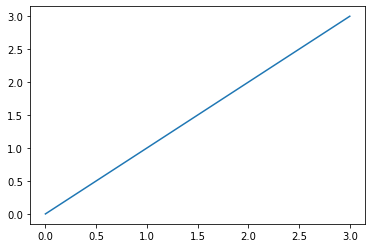

In [3]:

import matplotlib.pyplot as plt
plt.plot([0,1,2,3],[0,1,2,3])









In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import mplcursors
from mpldatacursor import datacursor
from matplotlib.widgets import Cursor , Button
fig,ax=plt.subplots()
x,=plt.plot([0,1,2,3,4],[0,1,2,3,4])
cursor=Cursor(ax)
'''
def onclk(event):
    x1,y1=event.xdata,event.ydata
    print(x1,y1)
    
fig.canvas.mpl_connect('button_press_event',onclk)
'''
'''
def on_move(event):
    if event.inaxes:
        x0, y0 = trans.transform((event.xdata, event.ydata))
        #user coordinates=event.xdata, event.ydata, these are values seen by user, plot coordinates x0, y0, unseen coordinates used by plot
        xfig, yfig = zip(*[trans.transform((x,y)) for x,y in zip(xdata,ydata)])
        dists = [math.sqrt((x-x0)**2+(y-y0)**2) for x,y in zip(xfig, yfig)]

        for n,(x,y,dist,label) in enumerate(zip(xdata,ydata,dists, labels)):
            if dist < markersize_inches and annotations[n] is None:
                annotations[n]=ax.annotate(
                    label,
                    [x,y], xycoords='data',
                    xytext = (10,10), textcoords='offset points',
                    ha='left', va='center',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),
                    zorder=10,
                )
                fig.canvas.draw()

            elif dist > markersize_inches and annotations[n] is not None:
                annotations[n].remove()
                annotations[n] = None
                fig.canvas.draw()
##connecting the event handler
cid = fig.canvas.mpl_connect('motion_notify_event', on_move)
'''
'''
def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))
'''
def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)
cid = fig.canvas.mpl_connect('button_press_event', onclick)


plt.show()
    

In [ ]:
def on_plot_hover(event):
    for curve in plot.get_lines():
        if curve.contains(event)[0]:
            print "over %s" % curve.get_gid()

fig.canvas.mpl_connect('motion_notify_event', on_plot_hover) 

In [ ]:
import plotly.express as px

df_2007 = px.data.gapminder().query("year==2007")

#fig = px.scatter(df_2007, x="gdpPercap", y="lifeExp", log_x=True,
 #                hover_name="country", hover_data=["continent", "pop"])
dat={'a':[0,1,2,3,4],'b':[0,1,2,3,4]}
fig=px.line(dat,x='a',y='b',hover_data=['a','b'])    

fig.show()

In [ ]:
import math
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
global x_values
x_values=[]
inp=0
print('input 000 to stop adding ')
while (True):
    inp=input("Enter X: ")
    if (inp=="000"):
        break
    else:
        x_values.append(float(inp))
inp2=input("Enter Zeta: ")
global n
n=1

global magnitude
magnitude=[]
def magn_res(x_values,n,zeta):
    magn=[]
    for i in x_values:
        magn.append(n/(np.sqrt(math.pow((1-math.pow(i,2)),2)+math.pow((2*zeta*i),2))))
    return magn

global x_lists
x_lists=[]
global mag_lists
mag_lists=[]
global z_lists
z_lists=[]
def onck(z):
    magnitude=magn_res(x_values,n,z)
    if magnitude not in mag_lists:
        mag_lists.append(magnitude)
        x_lists.append(x_values)
        z_lists.append([z for i in range(len(x_values))])
    dic={'Magnitude':magnitude,'X':x_values,'Zeta':[z for i in range(len(x_values))]}
    df=pd.DataFrame(dic)
    plt.rcParams["figure.figsize"] = (20,10)
    for i in range(len(mag_lists)):
        plt.plot(x_lists[i],mag_lists[i],label='Z= '+str(z_lists[i][0])) 
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel('Magnitude')
    plt.xscale('log')
    plt.yscale('log')
    plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10],
              [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10])
    plt.ylim(0.1,10)
    plt.grid(True)
    plt.legend()
     
    plt.show()
    print(df.to_string(index=False))
    

    
    
tex=widgets.FloatText(
    value=float(inp2),
    description='Zeta:',
    disabled=False,
    continuous_update=True
)
widgets.interact(onck,z=tex)

input 000 to stop adding 
